#  **Лабораторна робота №4**
##   Метод k найближчих сусідів
##### Підгрупа №2
##### Виконала: Бранівська Валерія  ст.гр.КМ-23
---
Імпортування відповідних бібліотек Python.

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import  ShuffleSplit
from sklearn import neighbors

1. Відкрити та зчитати наданий файл з даними.

In [67]:
df = pd.read_csv('ЛР4-пгр2.csv', sep=";")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


2. Визначити та вивести кількість записів та кількість полів у
завантаженому наборі даних.

In [68]:
print(f"Розмір: {df.size}")
print(f"Кількість рядків: {df.shape[0]}\nКількість стовпців: {df.shape[1]}\n")


Розмір: 19188
Кількість рядків: 1599
Кількість стовпців: 12



3. Вивести атрибути набору даних.

In [69]:
print(f"Атрибути набору даних та їх тип:\n{df.dtypes}")

Атрибути набору даних та їх тип:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


4. Отримати десять варіантів перемішування набору даних та розділення
його на навчальну (тренувальну) та тестову вибірки, використовуючи
функцію ShuffleSplit. Сформувати начальну та тестові вибірки на
основі восьмого варіанту. З’ясувати збалансованість набору даних.

In [78]:
rs = ShuffleSplit(n_splits=10, train_size=0.6, test_size= 0.25,random_state=50)
# n_splits -> num of variants
# train/test_size -> represent the proportion of the dataset to include in the test/train
# random_state -> controls the randomness of the training and testing indices produced.
splits_list = list(rs.split(df))

train_id, test_id = splits_list[7]

train = df.iloc[train_id]
test = df.iloc[test_id]

print(f"Збалансованість TRAIN набору даних:"
      f"\n{train.iloc[:, -1].value_counts(normalize=True)}")

print(f"Збалансованість TEST набору даних:"
      f"\n{test.iloc[:, -1].value_counts(normalize=True)}")

Збалансованість TRAIN набору даних:
5    0.445255
6    0.370177
7    0.137643
4    0.028154
8    0.013556
3    0.005214
Name: quality, dtype: float64
Збалансованість TEST набору даних:
6    0.4200
5    0.4075
7    0.1050
4    0.0500
8    0.0100
3    0.0075
Name: quality, dtype: float64


"ручна" зміна параметрів розподілу не впливає на покращення збалансованість. Потрібно використовувати додаткові методи для підбору.

5. Використовуючи функцію KNeighborsClassifier бібліотеки scikit-learn,
збудувати класифікаційну модель на основі методу k найближчих
сусідів (значення всіх параметрів залишити за замовчуванням) та
навчити її на тренувальній вибірці, вважаючи, що цільова
характеристика визначається стовпчиком quality, а всі інші виступають
в ролі вихідних аргументів

---
- n_neighborsint, default=5 -> Number of neighbors to use by default for kneighbors queries.

- weights -> Weight function used in prediction. Possible values:

    + ‘uniform’ : points in each neighborhood are weighted equally.
    + ‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.
    + [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.

- algorithm{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’
Algorithm used to compute the nearest neighbors

- leaf_sizeint
Leaf size passed to BallTree or KDTree. This can affect the speed of the construction and query, as well as the memory required to store the tree. The optimal value depends on the nature of the problem.

- pfloat
Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used. This parameter is expected to be positive.

- metricstr or callable, default=’minkowski’
Metric to use for distance computation. Default is “minkowski”, which results in the standard Euclidean distance when p = 2. See the documentation of scipy.spatial.distance and the metrics listed in distance_metrics for valid metric values.

- n_jobsint, default=None
The number of parallel jobs to run for neighbors search.
---


In [71]:
x_train = train.iloc[:, :-1]  # вихідні аргументи
y_train = train.iloc[:, -1]   # цільова хар-ка -> quality

x_test = test.iloc[:, :-1]
y_test = test.iloc[:, -1]

model = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)

model.fit(x_train, y_train)

KNeighborsClassifier()

6. Обчислити класифікаційні метрики збудованої моделі для тренувальної
та тестової вибірки. Представити результати роботи моделі на тестовій
вибірці графічно

In [72]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

# Метрики з output_dict=True
report_train = classification_report(y_train, y_pred_train, output_dict=True, zero_division=1)
report_test = classification_report(y_test, y_pred_test, output_dict=True, zero_division=1)

# Вивід у консоль
print(" === Метрики для тренувальної вибірки === ")
print(f"Accuracy: {accuracy_score(y_train, y_pred_train):.4f}")
print("Звіт класифікації:")
print(classification_report(y_train, y_pred_train, zero_division=1))

print("\n === Метрики для тестової вибірки === ")
print(f"Accuracy: {accuracy_score(y_test, y_pred_test):.4f}")
print("Звіт класифікації:")
print(classification_report(y_test, y_pred_test, zero_division=1))


 === Метрики для тренувальної вибірки === 
Accuracy: 0.6548
Звіт класифікації:
              precision    recall  f1-score   support

           3       1.00      0.00      0.00         5
           4       0.50      0.14      0.22        28
           5       0.66      0.79      0.72       414
           6       0.64      0.66      0.65       386
           7       0.74      0.38      0.50       113
           8       0.00      0.00      0.00        13

    accuracy                           0.65       959
   macro avg       0.59      0.33      0.35       959
weighted avg       0.65      0.65      0.64       959


 === Метрики для тестової вибірки === 
Accuracy: 0.5225
Звіт класифікації:
              precision    recall  f1-score   support

           3       1.00      0.00      0.00         2
           4       0.00      0.00      0.00        17
           5       0.54      0.76      0.63       156
           6       0.51      0.47      0.49       159
           7       0.52      0.

In [73]:
def plot_matrics(title,df_result):
    
    report_df = pd.DataFrame(df_result).transpose()
    classes = [label for label in report_df.index if label.isdigit()]
    metrics_df = report_df.loc[classes, ['precision', 'recall', 'f1-score']]
    metrics_df['class'] = classes
    
    plt.figure(figsize=(12, 6))
    
    for metric in ['precision', 'recall', 'f1-score']:
        plt.plot(metrics_df['class'], metrics_df[metric], label=metric, marker='o')

    # Пошук максимумів для підписів
    for metric in ['precision', 'recall', 'f1-score']:
        max_idx = metrics_df[metric].astype(float).idxmax()
        x = metrics_df.loc[max_idx, 'class']
        y = metrics_df.loc[max_idx, metric]
        plt.scatter(x, y, s=100, color='red', zorder=5)
        plt.text(x, y + 0.02, f'Max {metric} @ {x} = {y:.2f}', fontsize=9, ha='center', va='bottom')
    
    plt.xlabel("Class")
    plt.ylabel("Metric Value")
    plt.title(title)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.ylim(0, 1.05)
    plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), fontsize=9)
    plt.tight_layout()
    plt.show()
      


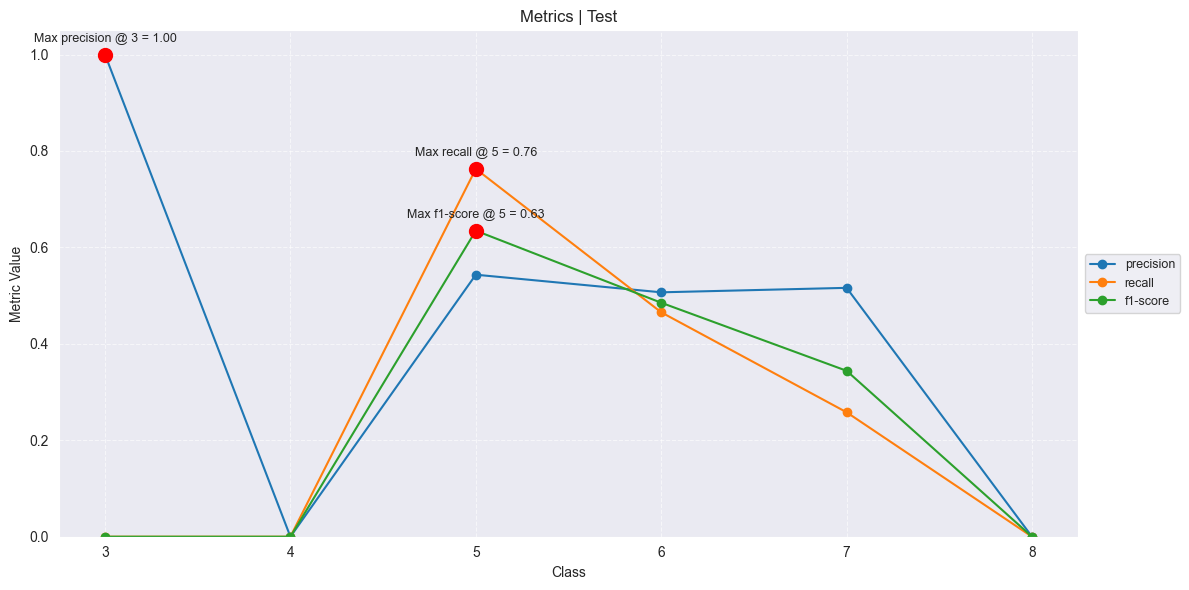

In [74]:
plot_matrics("Metrics | Test",report_test)

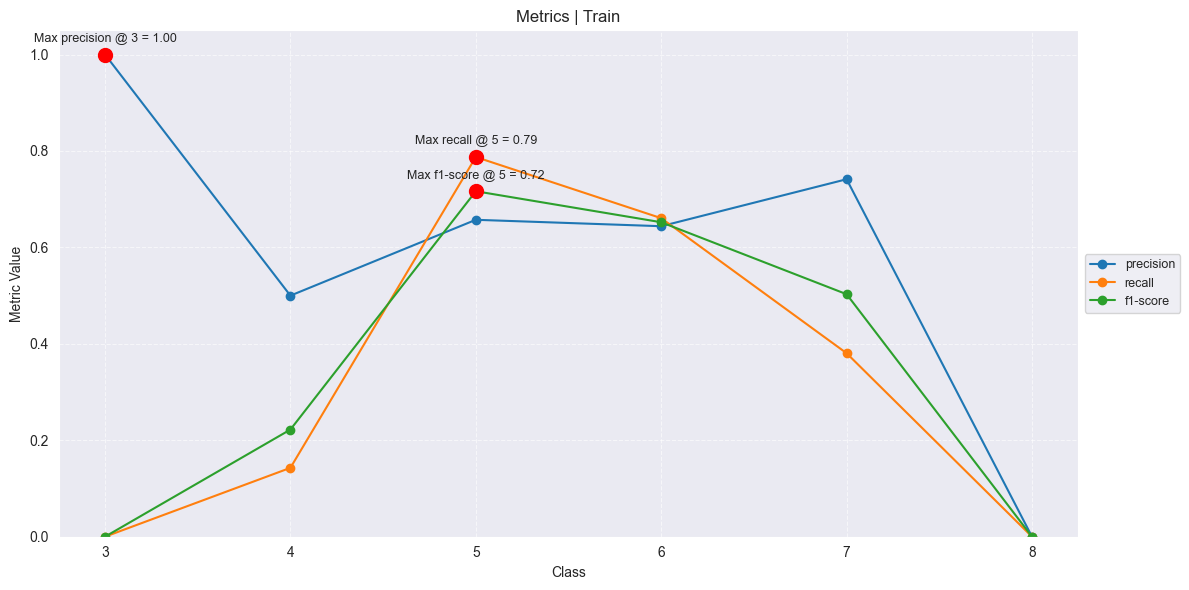

In [75]:
plot_matrics("Metrics | Train", report_train)

7. З’ясувати вплив кількості сусідів (від 1 до 20) на результати
класифікації. Результати представити графічно

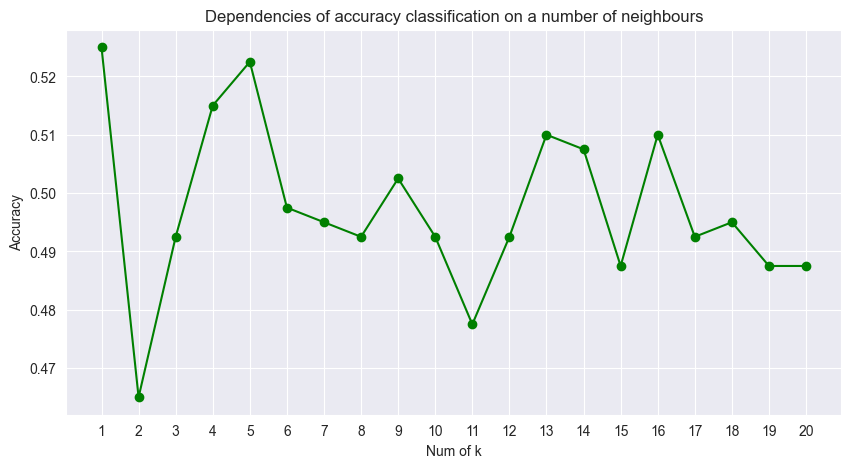

In [76]:
k_num = range(1,21)
res = []
for k in k_num:
    model = neighbors.KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    res.append(acc)

# Графік
plt.figure(figsize=(10, 5))
plt.plot(k_num, res, marker='o', linestyle='-', color='green')

plt.title('Dependencies of accuracy classification on a number of neighbours')
plt.xlabel('Num of k')
plt.ylabel('Accuracy')
plt.xticks(k_num)
plt.grid(True)
plt.show()



Якщо точність падає при великих значеннях k, можливо модель надто згладжена.

Якщо точність сильно коливається при малих k — модель може бути занадто чутливою до шуму (overfitting).

Найкращий k — той, що дає найвищу стабільну точність.

Окрім кількості сусідів впливає також параметри при розподілі.